In [1]:
import numpy as np
from IPython.display import display, Math

from lib.pde_find_1_5d import PDEFind
from lib.utils.plot_1D import plot_2d, plot_3d

In [2]:
data = np.load("data/2.npz")

u = data["u"]
x = data["x"]
t = data["t"]

In [3]:
pdefind = PDEFind(u, x, t, lib_size=3)

In [4]:
library, labels = pdefind.create_library(u)

display(Math(r"\\".join(labels)))

<IPython.core.display.Math object>

In [5]:
u_t = np.gradient(u, t[0], axis=1)

In [6]:
coef, alpha = pdefind.solve_regression(library, u_t, algorithm="lasso")

In [7]:
display(Math(pdefind.latex_string()))

<IPython.core.display.Math object>

In [8]:
sol = pdefind.solve_pde(u[:, 0], t[0])

In [9]:
error = pdefind.verify_pde_rel_l2()

print(f"rel. L2 Error {error}")

rel. L2 Error 0.07785350252715703


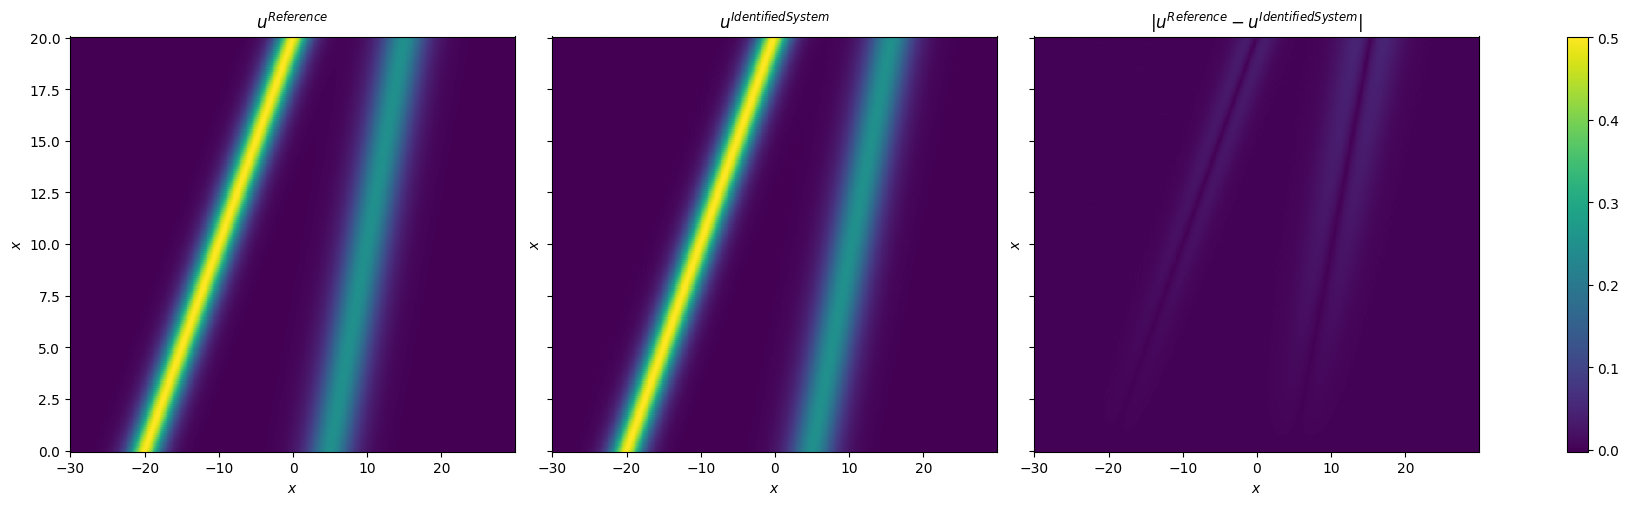

In [11]:
ref_sol = np.stack([x, t, u], axis=-1)
sol_plot = np.expand_dims(sol, axis=2)
plot_2d(sol_plot, ref_sol)

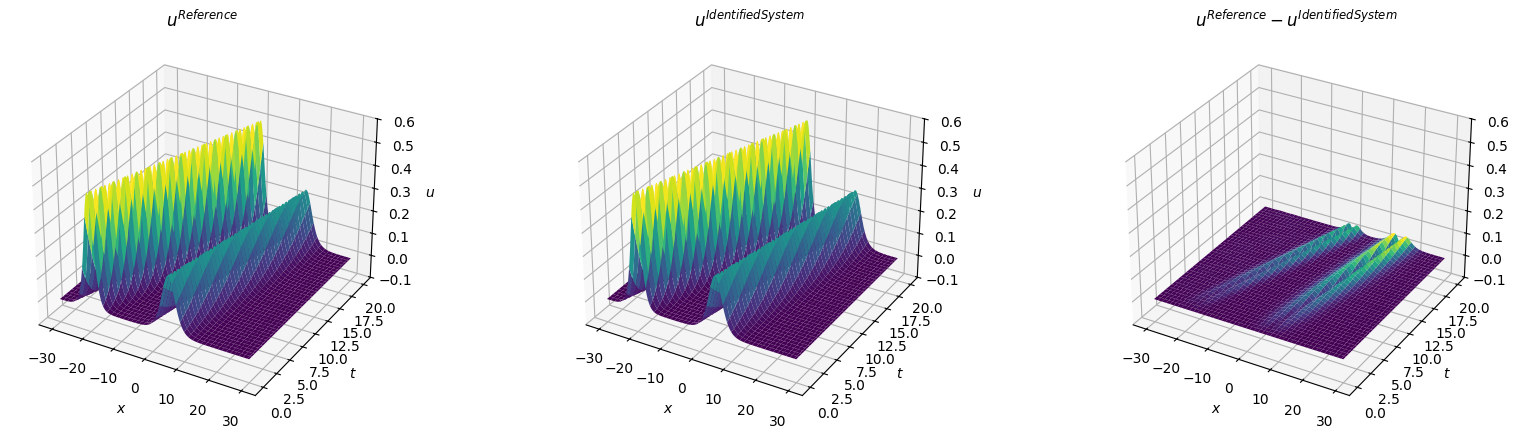

In [12]:
plot_3d(sol_plot, ref_sol)